In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import tarfile
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
import time
import math
import cv2
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import log_loss,confusion_matrix
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,MaxPooling2D,Conv2D,Dropout,BatchNormalization
from tensorflow.keras import backend as k 
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from sklearn.datasets import load_files
import cv2
import pickle
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
from statistics import mode
from sklearn.utils.multiclass import unique_labels

In [4]:
train_df=pd.read_csv('/kaggle/input/datathonindoml-2022/train_labels.csv')
train_df

,id,label
0,0,1
1,1,13
2,2,13
3,3,14
4,4,6
...,...,...
15995,15995,2
15996,15996,15
15997,15997,3
15998,15998,9


In [5]:
train_path='/kaggle/input/datathonindoml-2022/train/train/'
val_path='/kaggle/input/datathonindoml-2022/validation/validation/'

In [6]:
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
import cv2

In [7]:
train_df.columns

Index(['id', 'label'], dtype='object')

In [8]:
train_image = []
for i in tqdm(range(train_df.shape[0])):
    img = image.load_img('/kaggle/input/datathonindoml-2022/train/train/'+train_df['id'][i]+'.tif')
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/16000 [00:00<?, ?it/s]


TypeError: can only concatenate str (not "numpy.int64") to str

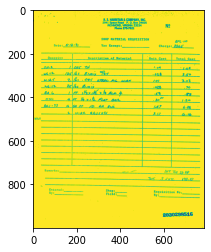

In [9]:
import matplotlib.pyplot as plt
img = plt.imread('/kaggle/input/datathonindoml-2022/train/train/0.tif')
plt.imshow(img)
plt.show()

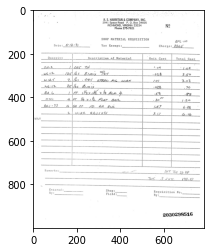

In [10]:
img = cv2.imread('/kaggle/input/datathonindoml-2022/train/train/0.tif')
plt.imshow(img)

In [11]:
img.shape

(1000, 786, 3)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [13]:
train_df

,id,label
0,0,1
1,1,13
2,2,13
3,3,14
4,4,6
...,...,...
15995,15995,2
15996,15996,15
15997,15997,3
15998,15998,9


In [14]:
train_df['id'] = train_df['id'].astype(str)
train_df['label'] = train_df['label'].astype(str)
train_df['id'] =(train_df['id']+'.tif').astype(str)

In [15]:

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory = train_path,
    subset = 'training',
    x_col = 'id',
    y_col = 'label',
    target_size = (224,224),
#     class_mode = 'categorical',
    class_mode='sparse'
)

val_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory = train_path,
    subset = 'validation',
    x_col = 'id',
    y_col = 'label',
    target_size = (224,224),
#     class_mode = 'categorical',
    class_mode='sparse'
)

Found 13600 validated image filenames belonging to 16 classes.
Found 2400 validated image filenames belonging to 16 classes.


In [16]:

x,y = next(train_generator)
x.shape # input shape of one record is (331,331,3) , 32: is the batch size

(32, 224, 224, 3)

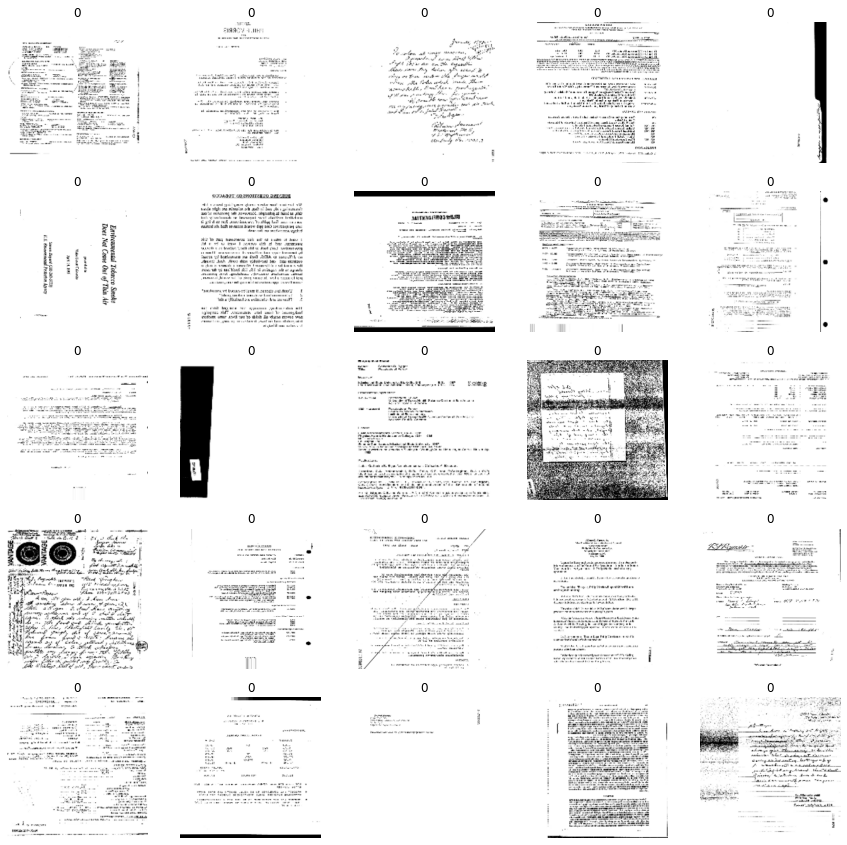

In [17]:
a = train_generator.class_indices
class_names = list(a.keys())  # storing class/breed names in a list
 
 
def plot_images(img, labels):
    plt.figure(figsize=[15, 15])
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
 
plot_images(x,y)

In [18]:
import os
import itertools
import sys
import xml.etree.ElementTree as ET
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.applications.resnet50 import ResNet50
# from keras import backend as K
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from PIL import Image
from sklearn.metrics import (f1_score,
                             precision_score,
                             recall_score)

%matplotlib inline

In [19]:
class_names 

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [20]:
num_classes = len(class_names)
num_classes

16

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

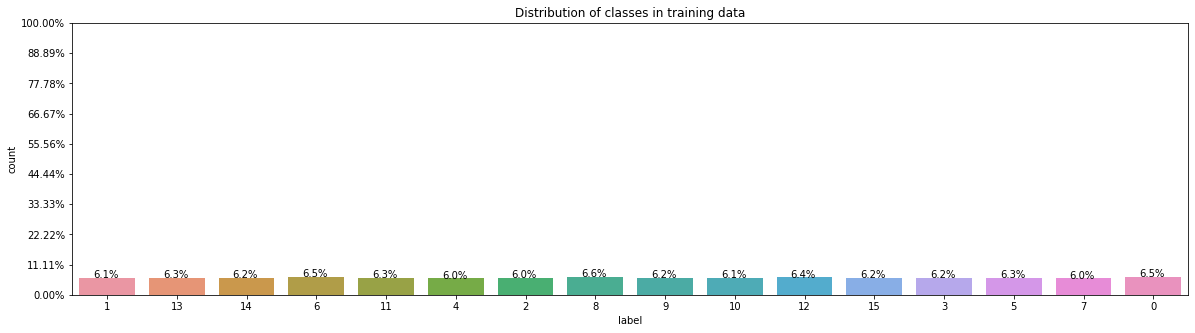

In [22]:
plt.figure(figsize=(20, 5))
Y=train_df
total = len(Y)
ax=sns.countplot(x=Y.label, data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.2, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 10))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.title('Distribution of classes in training data')
plt.show()

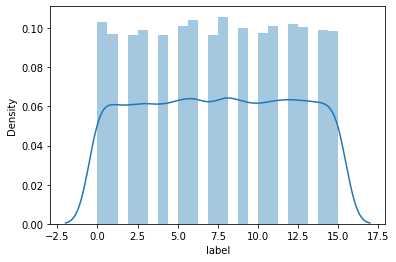

In [23]:
sns.distplot(train_df.label)
plt.show()

In [24]:
batch_size = 50
img_height = 224
img_width = 224

In [25]:
num_classes=16

In [26]:
# Importing keras InceptionRsnetv2 pretrained model (on ImageNet)
# We will use the ImageNet weight to initialize the model and fine tune using backpropagation(Transfer Learning) 
from tensorflow.keras import applications
from tensorflow.keras import regularizers

model=applications.InceptionResNetV2(
    weights = "imagenet", 
    include_top=False, 
    input_shape = (img_width, img_height, 3)
)

#for layer in model.layers[:15]:
#    layer.trainable = False
#Adding custom Layers 

x = model.output
x=Dropout(0.5)(x)
x = Flatten()(x)

output = Dense(num_classes, activation="softmax")(x)
model = Model(model.input, output)
model.summary()

2022-09-24 02:14:14.345686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 02:14:14.457103: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 02:14:14.457967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 02:14:14.459414: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

219070464/219055592 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
___________________________

In [27]:
log=[]

In [28]:
# Training for 30 epochs
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

checkpoint = ModelCheckpoint("inceptionresnet.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             period=1)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                              factor=0.2, 
                              patience=3, 
                              min_lr=0.0001,
                              mode='auto')

callbacks=[checkpoint,reduce_lr]

history=model.fit(
    train_generator,
    # samples_per_epoch =5000,
    epochs = 30,
    validation_data = val_generator,
    validation_steps =math.ceil(3000//(batch_size)),
    callbacks = callbacks,verbose=1)

log.append(history)

2022-09-24 02:14:23.192959: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-09-24 02:14:41.292036: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


425/425 [==============================] - 345s 755ms/step - loss: 2.9417 - accuracy: 0.4140 - val_loss: 3193.5706 - val_accuracy: 0.1984
Epoch 2/30
425/425 [==============================] - 238s 560ms/step - loss: 2.9719 - accuracy: 0.4740 - val_loss: 4916.9058 - val_accuracy: 0.1885
Epoch 3/30
425/425 [==============================] - 237s 557ms/step - loss: 2.3709 - accuracy: 0.5090 - val_loss: 352.0850 - val_accuracy: 0.2583
Epoch 4/30
425/425 [==============================] - 234s 549ms/step - loss: 2.5155 - accuracy: 0.4430 - val_loss: 432.6794 - val_accuracy: 0.0891
Epoch 5/30
425/425 [==============================] - 232s 546ms/step - loss: 2.2276 - accuracy: 0.4959 - val_loss: 37.8884 - val_accuracy: 0.5151
Epoch 6/30
425/425 [==============================] - 232s 546ms/step - loss: 1.9539 - accuracy: 0.5280 - val_loss: 1.4367 - val_accuracy: 0.5568
Epoch 7/30
425/425 [==============================] - 236s 555ms/step - loss: 1.7428 - accuracy: 0.5740 - val_loss: 20.9666 

In [29]:
model.save('resinception_1.h5')

In [30]:
history1=model.fit(train_generator,
                   epochs = 30,
                   validation_data = val_generator,
                   validation_steps =math.ceil(10000//(batch_size*2)),
                   callbacks = callbacks,
                   verbose=1
                  )

log.append(history)

Epoch 1/30
425/425 [==============================] - 238s 559ms/step - loss: 1.0619 - accuracy: 0.7146 - val_loss: 1.2593 - val_accuracy: 0.6737
Epoch 2/30
425/425 [==============================] - 209s 491ms/step - loss: 1.0400 - accuracy: 0.7211
Epoch 3/30
425/425 [==============================] - 206s 485ms/step - loss: 1.1003 - accuracy: 0.7182
Epoch 4/30
425/425 [==============================] - 207s 487ms/step - loss: 1.0747 - accuracy: 0.7307
Epoch 5/30
425/425 [==============================] - 207s 488ms/step - loss: 1.0094 - accuracy: 0.7441
Epoch 6/30
425/425 [==============================] - 208s 489ms/step - loss: 1.2381 - accuracy: 0.6913
Epoch 7/30
425/425 [==============================] - 207s 486ms/step - loss: 1.1593 - accuracy: 0.7107
Epoch 8/30
425/425 [==============================] - 208s 488ms/step - loss: 1.0564 - accuracy: 0.7286
Epoch 9/30
425/425 [==============================] - 209s 491ms/step - loss: 1.0407 - accuracy: 0.7311
Epoch 10/30
425/425 [=

In [31]:
model.save('resinception_85.h5')

In [32]:
batch_size=50
history2=model.fit_generator(train_generator,
                             epochs = 30,
                             validation_data = val_generator,
                             validation_steps =math.ceil(10000//(batch_size*2)),
                             callbacks = callbacks,verbose=1
                            )

log.append(history)

Epoch 1/30
425/425 [==============================] - 242s 570ms/step - loss: 0.5232 - accuracy: 0.8333 - val_loss: 1.2278 - val_accuracy: 0.6892
Epoch 2/30
425/425 [==============================] - 207s 487ms/step - loss: 0.5712 - accuracy: 0.8157
Epoch 3/30
425/425 [==============================] - 207s 486ms/step - loss: 0.5556 - accuracy: 0.8208
Epoch 4/30
425/425 [==============================] - 206s 485ms/step - loss: 0.5300 - accuracy: 0.8290
Epoch 5/30
425/425 [==============================] - 207s 488ms/step - loss: 0.5554 - accuracy: 0.8205
Epoch 6/30
425/425 [==============================] - 205s 483ms/step - loss: 0.6681 - accuracy: 0.7891
Epoch 7/30
425/425 [==============================] - 205s 482ms/step - loss: 0.5524 - accuracy: 0.8202
Epoch 8/30
425/425 [==============================] - 206s 484ms/step - loss: 0.4584 - accuracy: 0.8514
Epoch 9/30
425/425 [==============================] - 206s 484ms/step - loss: 0.4347 - accuracy: 0.8629
Epoch 10/30
425/425 [=

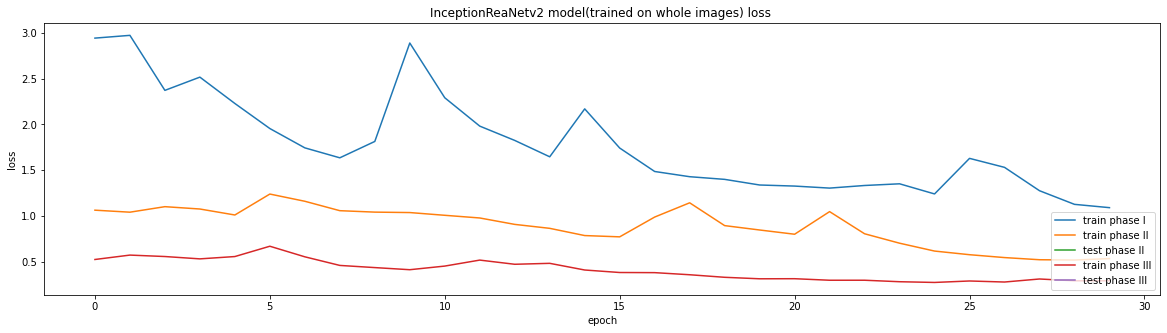

In [39]:
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('InceptionReaNetv2 model(trained on whole images) loss ')
plt.ylabel('loss')
plt.xticks([0,5,10,15,20,25,30])
plt.xlabel('epoch')
plt.legend(['train phase I', 
#             'test phase I',
            'train phase II', 'test phase II','train phase III', 'test phase III'], loc='lower right')
plt.show()

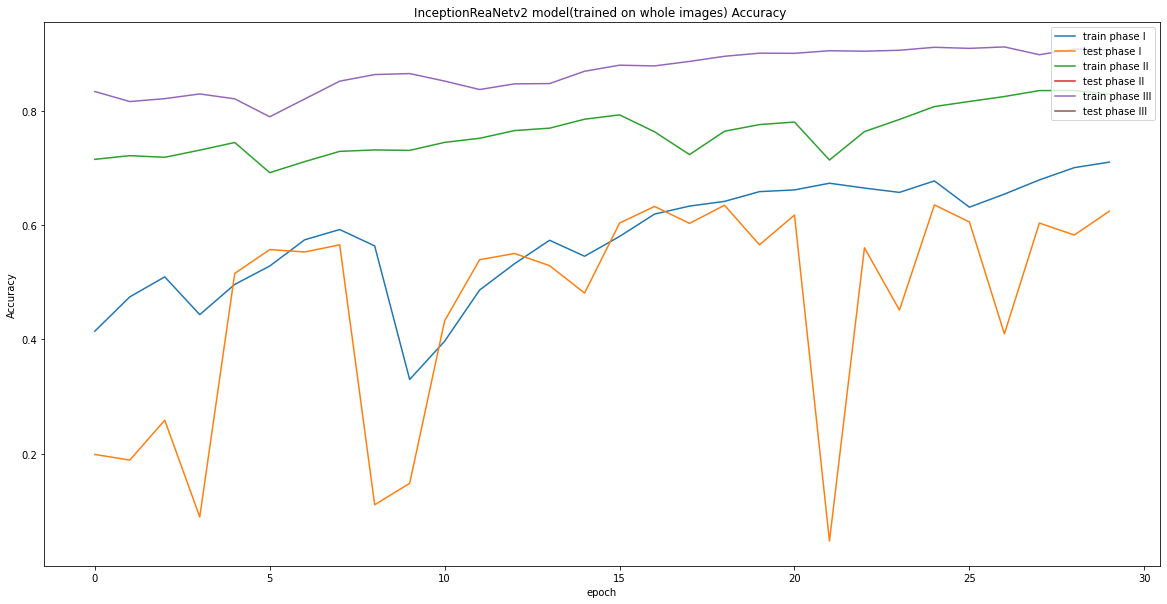

In [40]:
plt.figure(figsize=(20, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('InceptionReaNetv2 model(trained on whole images) Accuracy ')
plt.ylabel('Accuracy')
plt.xticks([0,5,10,15,20,25,30])
plt.xlabel('epoch')
plt.legend(['train phase I', 'test phase I','train phase II', 'test phase II','train phase III', 'test phase III'], loc='upper right')
plt.show()